## Setup

First, let's set up the environment by importing necessary libraries and loading the data.

In [1]:
# Import necessary libraries and modules
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.conect_db import conn_db
from scripts.tellCo_analysis import TellCoEDA
from scripts.user_engag_analysis import User_Engag_Analysis

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Connecting to a PostgreSQL Database

In [2]:
db = conn_db(
    database='TellCo_db',
    user='postgres',
    password='SH36@jit',
    host='localhost',
    port='5432'
)
db.connect()

Connected to TellCo_db database successfully.


In [3]:
# Fetch data as a DataFrame
df = db.fetch_data("SELECT * FROM xdr_data;")
db.disconnect()
# Initialize the TelecomEDA class
tellCo_data = TellCoEDA(df)

TellCo_db connection closed.


In [4]:
# data wrangling
df = tellCo_data.wrangle()

c:\Users\Coop\OneDrive\Desktop\10 Acedamy\week-2\scripts\tellCo_analysis.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[numeric_cols] = self.df[numeric_cols].fillna(self.df[numeric_cols].mean())


**Class Initialization**: The `User_Engag_Analysis` class is initialized with the telecom dataset.

In [5]:
User_Engag = User_Engag_Analysis(df)

### Top 10 Users by Engagement
- Aggregates session duration, download/upload traffic for each user and prints the top 10 users by engagement.

In [6]:
# Aggregate metrics per customer
User_Engag.aggr_user_metrics()

Top 10 customers by session duration:
                total_duration      total_dl      total_ul  total_traffic
MSISDN/Number                                                           
3.595829e+10     7.029411e+07  4.840458e+11  4.409934e+10   5.281451e+11
3.365973e+10     3.539256e+06  6.632265e+09  5.736239e+08   7.205889e+09
3.366553e+10     2.949867e+06  4.486999e+09  3.958571e+08   4.882856e+09
3.366471e+10     2.927785e+06  6.400774e+09  4.712445e+08   6.872018e+09
3.366027e+10     2.721327e+06  4.379552e+09  4.294022e+08   4.808954e+09
3.365936e+10     2.671855e+06  4.255728e+09  4.027094e+08   4.658437e+09
3.367588e+10     2.616081e+06  5.300460e+09  3.982917e+08   5.698752e+09
3.366475e+10     2.250808e+06  3.453685e+09  4.251757e+08   3.878861e+09
3.367557e+10     2.209198e+06  4.019985e+09  3.185460e+08   4.338531e+09
3.376233e+10     2.206754e+06  3.398224e+09  3.285008e+08   3.726725e+09
Top 10 customers by download traffic:
                total_duration      total_dl   

,total_duration,total_dl,total_ul,total_traffic
MSISDN/Number,,,,
3.360100e+10,1.167200e+05,8.426375e+08,3.605311e+07,8.786906e+08
3.360100e+10,1.812300e+05,1.207552e+08,3.610446e+07,1.568596e+08
3.360100e+10,1.349690e+05,5.566597e+08,3.930682e+07,5.959665e+08
3.360101e+10,4.987800e+04,4.019932e+08,2.032753e+07,4.223207e+08
3.360101e+10,3.710400e+04,1.363130e+09,9.428053e+07,1.457411e+09
...,...,...,...,...
3.378998e+10,2.103890e+05,1.023862e+09,7.083142e+07,1.094693e+09
3.379000e+10,8.810000e+03,6.879252e+08,2.671643e+07,7.146416e+08
3.379000e+10,1.409880e+05,4.445751e+08,3.573224e+07,4.803073e+08


`normalize_metrics()`: Normalizes the aggregated metrics using `MinMaxScaler`

In [7]:
User_Engag.normalize_metrics()

,total_duration,total_dl,total_ul,total_traffic
MSISDN/Number,,,,
3.360100e+10,0.001559,0.001723,0.000753,0.001601
3.360100e+10,0.002477,0.000231,0.000754,0.000234
3.360100e+10,0.001819,0.001132,0.000826,0.001066
3.360101e+10,0.000608,0.000812,0.000396,0.000737
3.360101e+10,0.000426,0.002798,0.002073,0.002697
...,...,...,...,...
3.378998e+10,0.002892,0.002097,0.001541,0.002010
3.379000e+10,0.000024,0.001403,0.000541,0.001290
3.379000e+10,0.001904,0.000900,0.000745,0.000847


`run_kmeans()`: Applies K-Means clustering with `k=3`, visualizing the clusters using a pairplot to show separation.

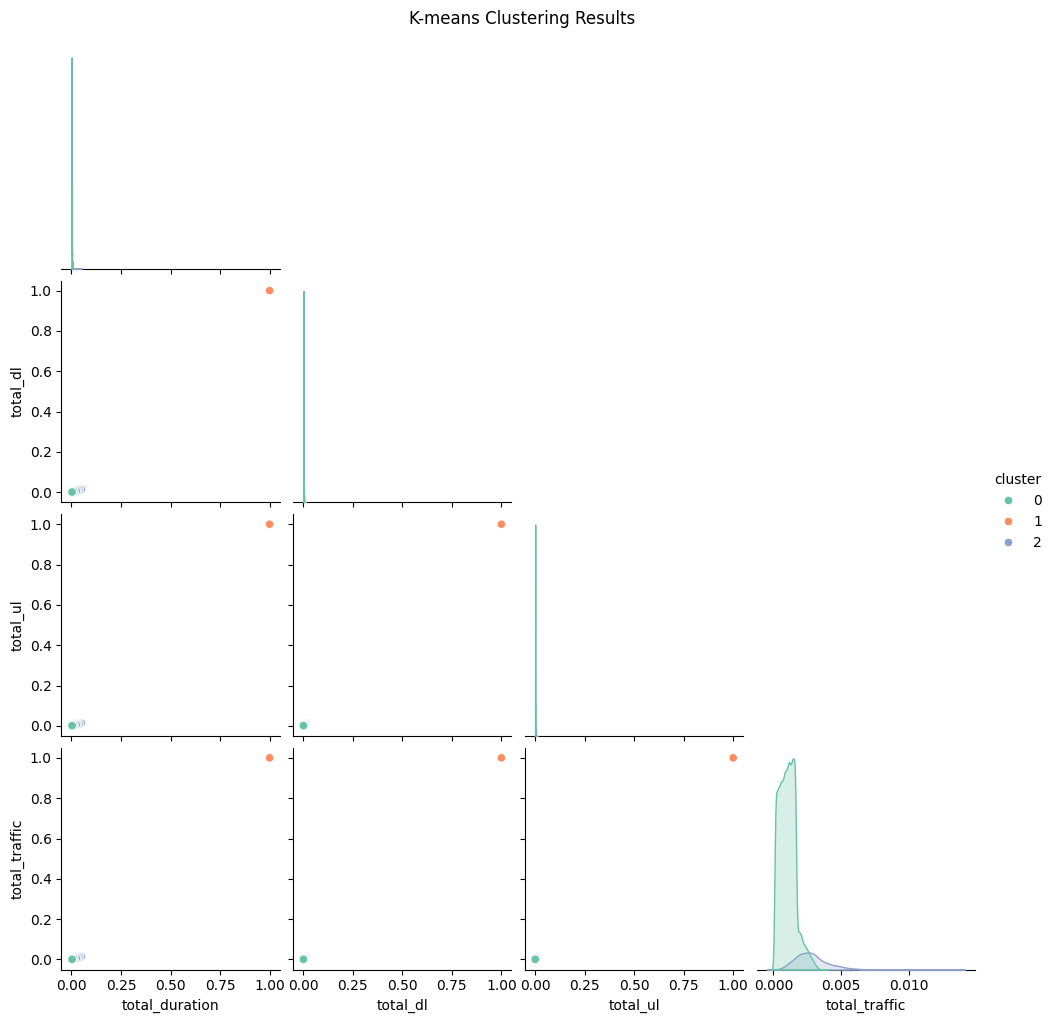

,total_duration,total_dl,total_ul,total_traffic,cluster
MSISDN/Number,,,,,
3.360100e+10,0.001559,0.001723,0.000753,0.001601,0
3.360100e+10,0.002477,0.000231,0.000754,0.000234,0
3.360100e+10,0.001819,0.001132,0.000826,0.001066,0
3.360101e+10,0.000608,0.000812,0.000396,0.000737,0
3.360101e+10,0.000426,0.002798,0.002073,0.002697,0
...,...,...,...,...,...
3.378998e+10,0.002892,0.002097,0.001541,0.002010,0
3.379000e+10,0.000024,0.001403,0.000541,0.001290,0
3.379000e+10,0.001904,0.000900,0.000745,0.000847,0


In [8]:
User_Engag.run_kmeans(k=3)


`plot_elbow_method()`: Uses the elbow method to help determine the optimal value of `k`

c:\Users\Coop\OneDrive\Desktop\10 Acedamy\week-2\scripts\user_engag_analysis.py:76: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bo-', color='red')


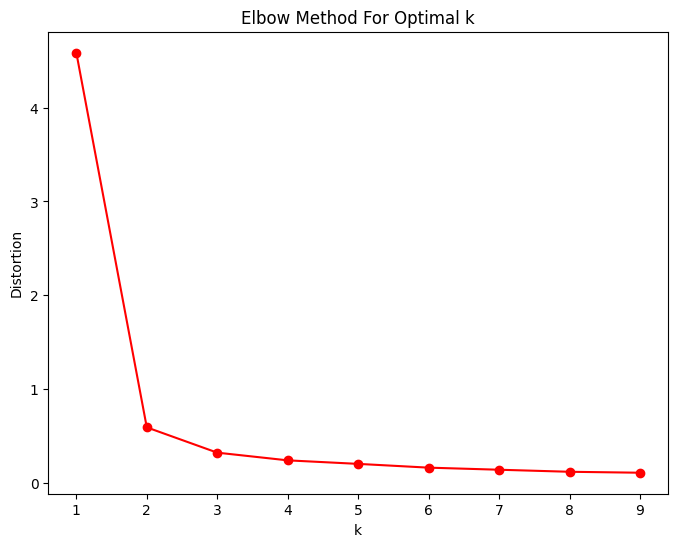

In [9]:
User_Engag.plot_elbow_method()

`compute_cluster_stats()`: Computes statistics (min, max, mean, sum) for each cluster based on non-normalized engagement metrics.

In [10]:
User_Engag.compute_cluster_stats()

Cluster Statistics:
         total_duration                                            \
                   min           max          mean           sum   
cluster                                                            
0         7.142000e+03  4.044460e+05  1.068330e+05  1.002831e+10   
1         7.029411e+07  7.029411e+07  7.029411e+07  7.029411e+07   
2         6.659400e+04  3.539256e+06  3.827800e+05  4.782071e+09   

             total_dl                                                total_ul  \
                  min           max          mean           sum           min   
cluster                                                                         
0        8.827082e+06  1.992887e+09  5.287188e+08  4.963031e+13  2.866892e+06   
1        4.840458e+11  4.840458e+11  4.840458e+11  4.840458e+11  4.409934e+10   
2        2.012614e+07  6.632265e+09  1.396311e+09  1.744412e+13  1.065627e+07   

                                                  total_traffic                \
  

total_duration                                            \
                   min           max          mean           sum   
cluster                                                            
0         7.142000e+03  4.044460e+05  1.068330e+05  1.002831e+10   
1         7.029411e+07  7.029411e+07  7.029411e+07  7.029411e+07   
2         6.659400e+04  3.539256e+06  3.827800e+05  4.782071e+09   

             total_dl                                                total_ul  \
                  min           max          mean           sum           min   
cluster                                                                         
0        8.827082e+06  1.992887e+09  5.287188e+08  4.963031e+13  2.866892e+06   
1        4.840458e+11  4.840458e+11  4.840458e+11  4.840458e+11  4.409934e+10   
2        2.012614e+07  6.632265e+09  1.396311e+09  1.744412e+13  1.065627e+07   

                                                  total_traffic                \
                  max          mean           sum           min           max   
cluster                                                                         
0        2.049022e+08  4.863007e+07  4.564856e+12  3.324901e+07  2.069444e+09   
1        4.409934e+10  4.409934e+10  4.409934e+10  5.281451e+11  5.281451e+11   
2        5.736239e+08  1.202210e+08  1.501921e+12  7.068660e+07  7.205889e+09   

                                     
                 mean           sum  
cluster                              
0        5.773489e+08  5.419516e+13  
1        5.281451e+11  5.281451e+11  
2        1.516532e+09  1.894604e+13

`plot_top_apps()`: Plots the top 3 applications based on total download data usage.

In [11]:
# Aggregate top users per application
User_Engag.aggregate_top_users_per_app()

Top 10 most engaged users per application:
                Social Media DL (Bytes)  Google DL (Bytes)  Youtube DL (Bytes)  \
MSISDN/Number                                                                   
3.595829e+10              1.926015e+09       5.979205e+09        1.244137e+10   
3.365973e+10              3.309578e+07       8.802774e+07        1.076394e+08   
3.366907e+10              2.347705e+07       5.491522e+07        1.362953e+08   
3.366553e+10              2.224100e+07       5.345341e+07        8.473615e+07   
3.365936e+10              2.091208e+07       6.507065e+07        9.959090e+07   
3.376054e+10              1.990734e+07       5.279744e+07        9.027802e+07   
3.362632e+10              1.919064e+07       5.210796e+07        8.231056e+07   
3.366471e+10              1.903573e+07       6.494602e+07        1.530745e+08   
3.376276e+10              1.887871e+07       4.912373e+07        1.130802e+08   
3.366025e+10              1.878640e+07       4.561468e+07        

,Social Media DL (Bytes),Google DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes)
MSISDN/Number,,,,,
3.595829e+10,1.926015e+09,5.979205e+09,1.244137e+10,1.223134e+10,4.495740e+11
3.365973e+10,3.309578e+07,8.802774e+07,1.076394e+08,1.880847e+08,6.188740e+09
3.366907e+10,2.347705e+07,5.491522e+07,1.362953e+08,7.892370e+07,3.166462e+09
3.366553e+10,2.224100e+07,5.345341e+07,8.473615e+07,1.366446e+08,4.174701e+09
3.365936e+10,2.091208e+07,6.507065e+07,9.959090e+07,1.298099e+08,3.919882e+09
3.376054e+10,1.990734e+07,5.279744e+07,9.027802e+07,7.240891e+07,4.608301e+09
3.362632e+10,1.919064e+07,5.210796e+07,8.231056e+07,7.719842e+07,3.726288e+09
3.366471e+10,1.903573e+07,6.494602e+07,1.530745e+08,1.349416e+08,6.013562e+09
3.376276e+10,1.887871e+07,4.912373e+07,1.130802e+08,7.575963e+07,3.284547e+09


`aggregate_top_users_per_app()`: Aggregates traffic data for each application and reports the top 10 most engaged users.

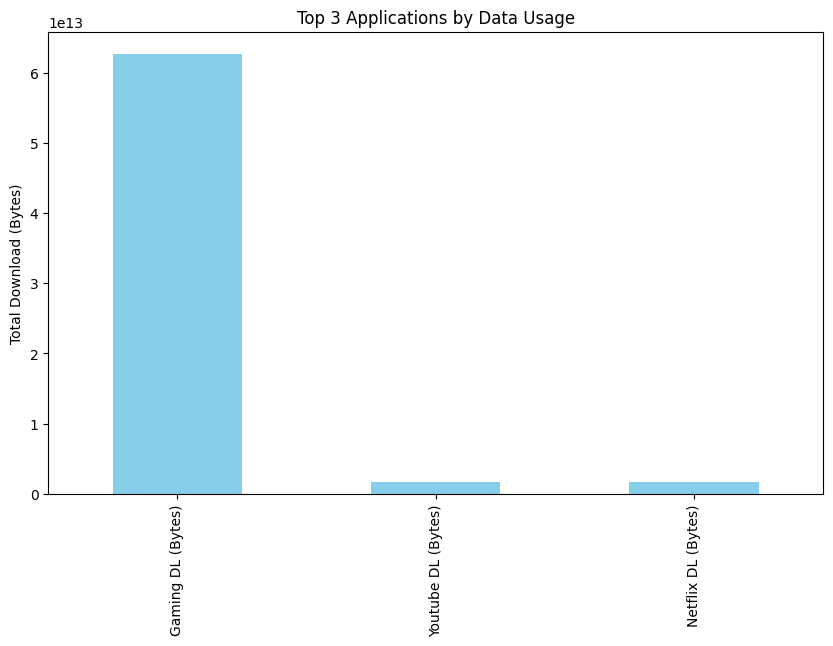

In [12]:
# Plot the top 3 most used applications
User_Engag.plot_top_apps()